In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ----------------------------------------

In [55]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
%matplotlib inline
import numpy as np

### Loading handwritten dataset from keras

In [7]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
x_test.shape

(10000, 28, 28)

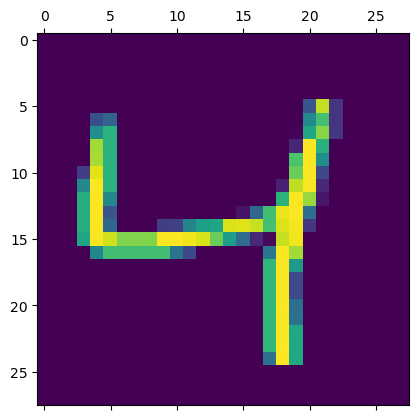

In [11]:
plt.matshow(x_train[2])

In [12]:
y_train[2]

4

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

### Flatten the training dataset

In [14]:
x_train.shape

(60000, 28, 28)

### Scaling the dataset for improving accuracy

In [18]:
x_train = x_train / 255
x_test = x_test / 255

In [19]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [25]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [26]:
x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

### Artificial Neural Network

#### For train data

In [44]:
ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4440 - accuracy: 0.8435
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4121 - accuracy: 0.9011
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.9248
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2526 - accuracy: 0.9367
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2235 - accuracy: 0.9427


In [30]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.9440


[0.33104363083839417, 0.9440000057220459]

##### CNN

In [58]:
cnn = keras.Sequential([
       #filters are based on your choice
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)),
    #maxpooling will take the maximum value from a matrix
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [59]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3172 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0676 - accuracy: 0.9802
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0534 - accuracy: 0.9835
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0416 - accuracy: 0.9869
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0346 - accuracy: 0.9893


In [60]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [61]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.9784


[0.09668022394180298, 0.9783999919891357]